# Import libraries

In [1]:
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

# Load dataset

In [8]:
filename = 'Boston.csv'
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
dataset = read_csv(filename,names = names)

# Analyze data

In [9]:
dataset.shape

(506, 14)

In [10]:
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [11]:
dataset.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [12]:
set_option('precision',1)
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.1e+02,506.0,506.0,5.1e+02,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6e+00,11.4,11.1,6.9e-02,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6e+00,23.3,6.9,2.5e-01,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,6.3e-03,0.0,0.5,0.0e+00,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,8.2e-02,0.0,5.2,0.0e+00,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9,17.0
50%,2.6e-01,0.0,9.7,0.0e+00,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4,21.2
75%,3.7e+00,12.5,18.1,0.0e+00,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,8.9e+01,100.0,27.7,1.0e+00,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


In [13]:
set_option('precision',2)
dataset.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


# Data visualizations

In [14]:
# Unimodal visualizations

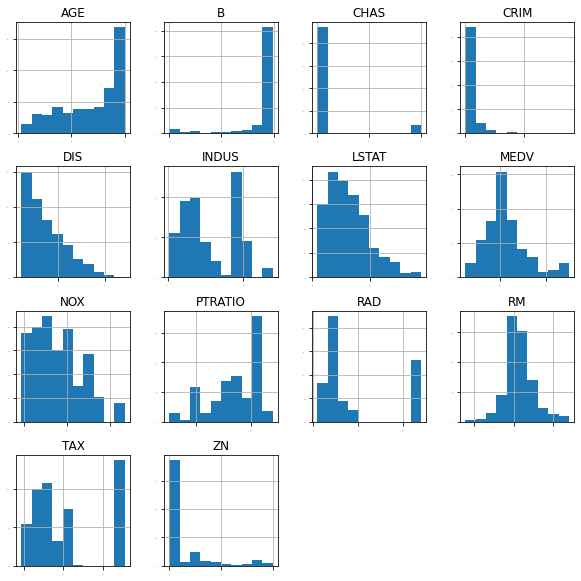

In [16]:
dataset.hist(sharex=False,sharey=False,xlabelsize=1,ylabelsize=1,figsize = (10,10))
pyplot.show()

/home/arvind/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/arvind/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/arvind/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/arvind/.local/lib/python3.6/site-packages/pa

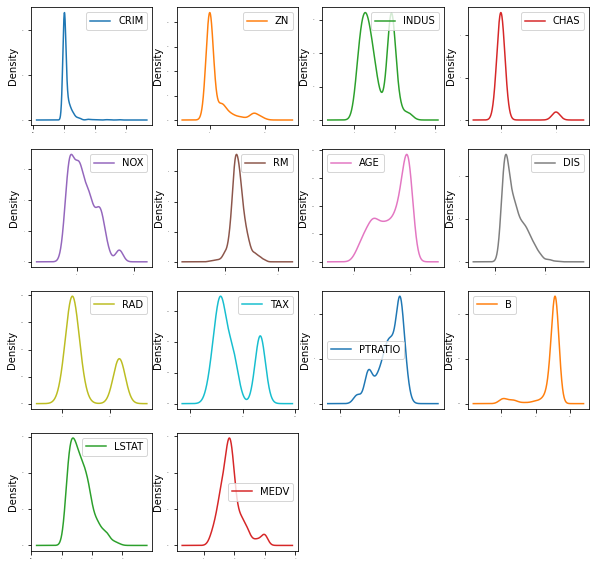

In [18]:
dataset.plot(kind='density',subplots=True,layout=(4,4),sharex=False,legend=True,fontsize=1,figsize=(10,10))
pyplot.show()

/home/arvind/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/arvind/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/arvind/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/arvind/.local/lib/python3.6/site-packages/pa

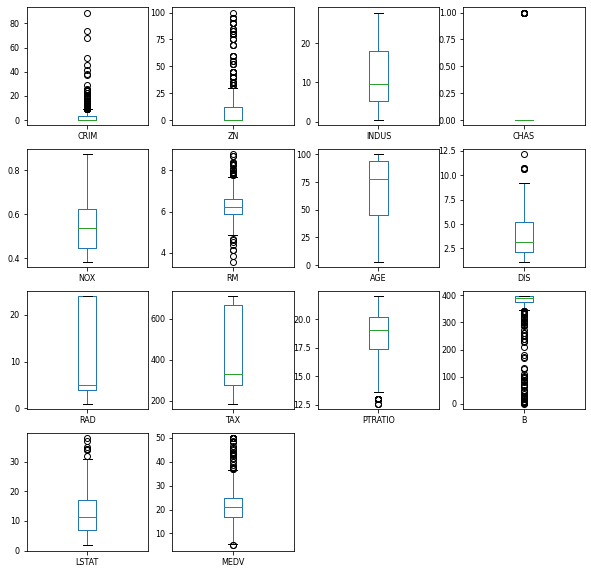

In [19]:
dataset.plot(kind='box',subplots=True,layout=(4,4),sharex=False,sharey=False,fontsize=8,figsize = (10,10))
pyplot.show()

# Multimodal data visualizations

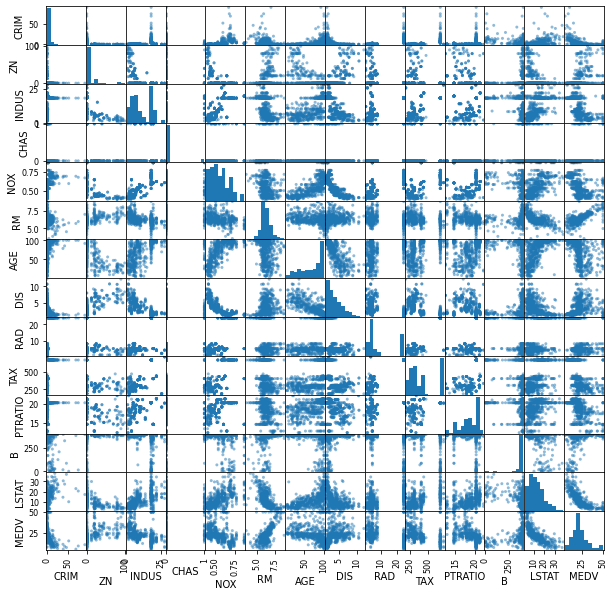

In [21]:
scatter_matrix(dataset,figsize = (10,10))
pyplot.show()

# Correlations

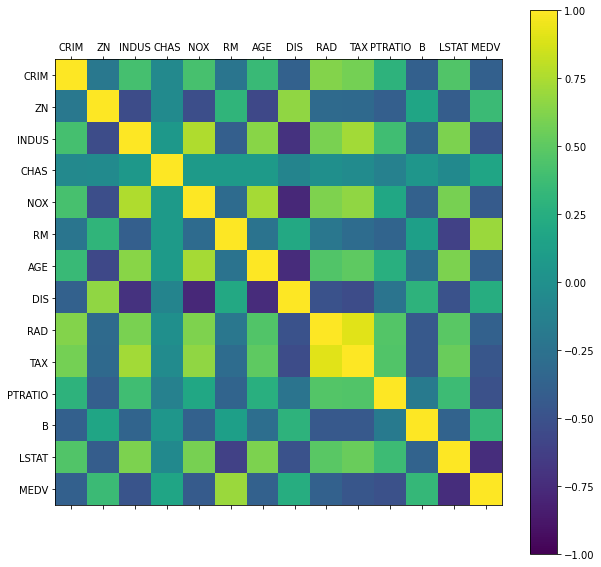

In [23]:
fig = pyplot.figure(figsize = (10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(),vmin=-1,vmax=1,interpolation='none')
fig.colorbar(cax)
ticks=numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

# Vaidation dataset

In [24]:
array = dataset.values
X = array[:,0:13]
Y=array[:,13]
validation_size = 0.2
seed = 7
X_train,X_validation,Y_train,Y_validation = train_test_split(X,Y,test_size = validation_size, random_state=seed)

# Evaluate algorithms

In [25]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [26]:
models = []
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

In [27]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=num_folds, random_state = seed)
    cv_results = cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)

/home/arvind/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/arvind/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/arvind/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/arvind/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect 

LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)
CART: -23.489162 (9.537615)
SVR: -67.827886 (29.049138)


In [28]:
# Compare algorithms

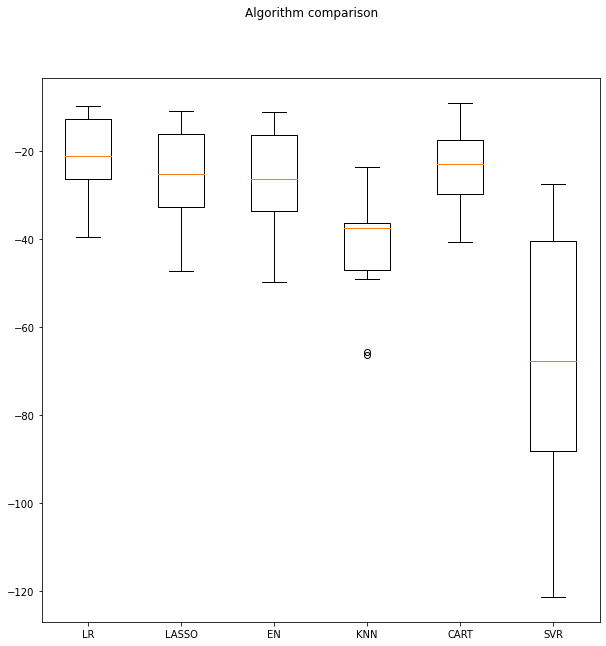

In [29]:
fig = pyplot.figure(figsize = (10,10))
fig.suptitle('Algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [31]:
# Evaluate algorithms : standardization

In [32]:
pipelines = []
pipelines.append(('ScaledLR',Pipeline([('Scaler',StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO',Pipeline([('Scaler',StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN',Pipeline([('Scaler',StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART',Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR',Pipeline([('Scaler',StandardScaler()),('SVR',SVR())])))

In [33]:
results = []
names = []
for name,model in pipelines:
    kfold = KFold(n_splits = num_folds,random_state = seed)
    cv_results = cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(),cv_results.std())
    print(msg)

/home/arvind/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/arvind/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/arvind/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/arvind/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect 

ScaledLR: -21.379856 (9.414264)
ScaledLASSO: -26.607314 (8.978761)
ScaledEN: -27.932372 (10.587490)
ScaledKNN: -20.107620 (12.376949)
ScaledCART: -21.482388 (8.129309)
ScaledSVR: -29.633086 (17.009186)


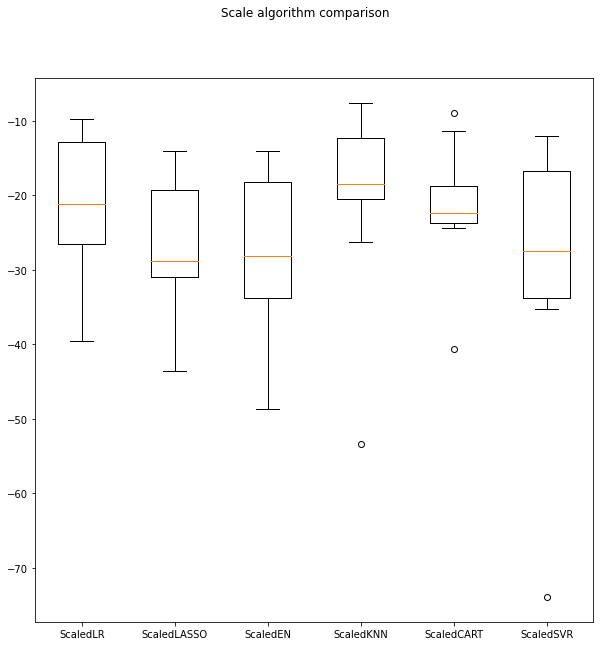

In [35]:
fig = pyplot.figure(figsize = (10,10))
fig.suptitle('Scale algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [36]:
# Improve results with tuning

In [42]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits = 10, random_state = 7)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(rescaledX,Y_train)
print("Best: %f using %s" %(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means,stds,params):
    print("%f (%f) with: %r" %(mean,stdev,param))

/home/arvind/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: -18.109304 using {'n_neighbors': 3}
-20.169640 (14.986904) with: {'n_neighbors': 1}
-18.109304 (12.880861) with: {'n_neighbors': 3}
-20.063115 (12.138331) with: {'n_neighbors': 5}
-20.514297 (12.278136) with: {'n_neighbors': 7}
-20.319536 (11.554509) with: {'n_neighbors': 9}
-20.963145 (11.540907) with: {'n_neighbors': 11}
-21.099040 (11.870962) with: {'n_neighbors': 13}
-21.506843 (11.468311) with: {'n_neighbors': 15}
-22.739137 (11.499596) with: {'n_neighbors': 17}
-23.829011 (11.277558) with: {'n_neighbors': 19}
-24.320892 (11.849667) with: {'n_neighbors': 21}


# Ensemble methods

In [43]:
ensembles = []
ensembles.append(('ScaledAB',Pipeline([('Scaler',StandardScaler()),('AB',AdaBoostRegressor())])))
ensembles.append(('ScaledGBM',Pipeline([('Scaler',StandardScaler()),('GBM',GradientBoostingRegressor())])))
ensembles.append(('ScaledRF',Pipeline([('Scaler',StandardScaler()),('RF',RandomForestRegressor())])))
ensembles.append(('ScaledET',Pipeline([('Scaler',StandardScaler()),('ET',ExtraTreesRegressor())])))

results = []
names = []
for name,model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state = seed)
    cv_results = cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

/home/arvind/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledAB: -14.856418 (6.416368)


/home/arvind/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledGBM: -10.095208 (4.367380)


/home/arvind/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledRF: -12.345444 (6.925728)


/home/arvind/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledET: -9.443476 (5.844790)


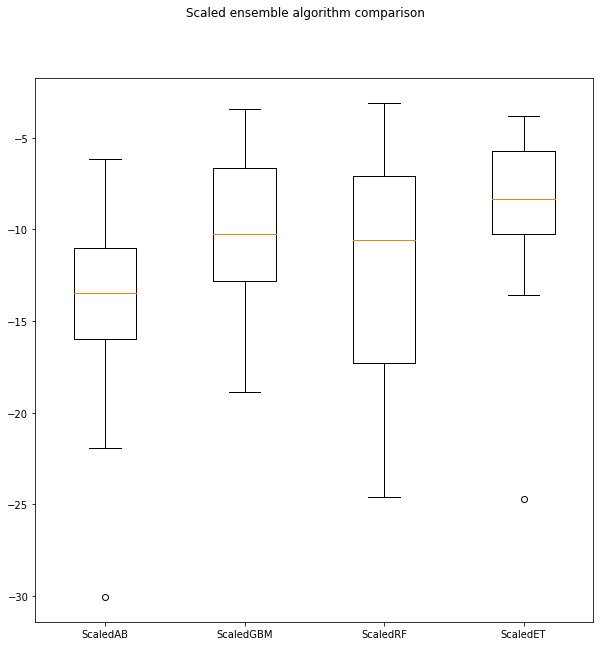

In [44]:
# compare algorithms

fig = pyplot.figure(figsize = (10,10))
fig.suptitle('Scaled ensemble algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [46]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators = numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state = seed)
kfold = KFold(n_splits = num_folds, random_state = seed)
grid = GridSearchCV(estimator = model,param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(rescaledX,Y_train)

/home/arvind/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [48]:
print("Best: %f using %s" %(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means,stds,params):
    print("%f (%f) with: %r"%(mean,stdev,param))

Best: -9.379670 using {'n_estimators': 400}
-10.813179 (4.856738) with: {'n_estimators': 50}
-10.057375 (4.566986) with: {'n_estimators': 100}
-9.718097 (4.404730) with: {'n_estimators': 150}
-9.565306 (4.394355) with: {'n_estimators': 200}
-9.477007 (4.376433) with: {'n_estimators': 250}
-9.453795 (4.385228) with: {'n_estimators': 300}
-9.394901 (4.367860) with: {'n_estimators': 350}
-9.379670 (4.382001) with: {'n_estimators': 400}


# Finalize model

In [49]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state = seed, n_estimators = 400)
model.fit(rescaledX,Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=7, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation,predictions))

11.902132586880027
